### Zad 1

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from PIL import Image
import io
from sympy.plotting.textplot import is_valid


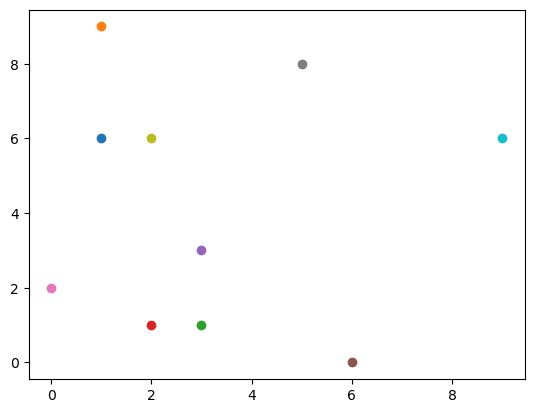

In [57]:
def cloud(n):
    x_values = np.random.randint(0, 10, n)
    y_values = np.random.randint(0, 10, n)
    points = list(zip(x_values, y_values))
    return points
points = cloud(10)
for i in range (len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.scatter(x, y)
plt.show()

### Generuje trzy rodzaje zbiorów punktów: 
rozkład jednostajny, rozkład normalny z czterema różnymi grupami parametrów, dziewięć odseparowanych grup punktów

In [132]:
def generate_points(uniform_n,normal_n,clusters_n,spread_factor):

    assert normal_n % 4 == 0, "normal_n musi być podzielne przez 4"
    assert clusters_n % 9 == 0, "clusters_n musi być podzielne przez 9"
    
    # 1. Rozkład jednostajny
    uniform_points = [tuple(spread_factor * np.array(point)) 
                     for point in np.random.uniform(low=0, high=10, size=(uniform_n, 2))]
    
    # 2. Cztery rozkłady normalne
    normal_params = [
        {'loc': [2, 2], 'scale': [0.3, 0.3]},
        {'loc': [8, 8], 'scale': [0.7, 0.7]},
        {'loc': [2, 8], 'scale': [0.5, 1.0]},
        {'loc': [8, 2], 'scale': [1.0, 0.5]}
    ]
    normal_points = []
    for params in normal_params:
        scaled_loc = spread_factor * np.array(params['loc'])
        scaled_scale = spread_factor * np.array(params['scale'])
        normal_points.extend(
            [tuple(point) for point in np.random.normal(
                loc=scaled_loc,
                scale=scaled_scale,
                size=(normal_n // 4, 2)
            )]
        )
    
    # 3. Dziewięć skupisk
    cluster_centers = spread_factor * np.array([
        [15, 15], [15, 25], [15, 35],
        [25, 15], [25, 25], [25, 35],
        [35, 15], [35, 25], [35, 35]
    ])
    cluster_points = []
    points_per_cluster = clusters_n // 9
    cluster_scale = 0.2 * spread_factor
    for center in cluster_centers:
        cluster_points.extend(
            [tuple(point) for point in np.random.normal(
                loc=center,
                scale=[cluster_scale, cluster_scale],
                size=(points_per_cluster, 2)
            )]
        )
    return uniform_points, normal_points, cluster_points

#### Wizualizator punktów na wykresie

In [126]:
def visualize(points):
    for i in range (len(points)):
        x = points[i][0]
        y = points[i][1]
        plt.scatter(x, y)
    plt.show()

#### Funkcje pomocnicze


In [112]:
def calculate_distance(points):
    n = len(points)
    sum = 0
    for i in range (n):
        dist = np.linalg.norm(np.array(points[i]) - np.array(points[i-1]))
        sum += dist
    return sum

In [113]:
def P(min_distance,distance,Temp):
    return np.exp((min_distance-distance)/Temp)

#### Główna implementacja algorytmu wyżarzania 

In [ ]:
def wyzarzanie_vis(points,T_max,type, max_iter=100000,alpha=0.99):
    T = T_max
    min_distance = calculate_distance(points)
    iter = 0
    distances = [] #wizualizacja

    while T > 0.00001 and iter < max_iter:
        current_distance = calculate_distance(points)
        
        # Zamiana kolejności punktów
        if type == 'arbitrary':
            a1, a2 = np.random.randint(0, len(points), size=2)
        elif type == 'consecutive':
            a1 = np.random.randint(0, len(points)-1)
            a2 = a1 + 1
            
        temp = points[a1]
        points[a1] = points[a2]
        points[a2] = temp
        
        new_distance = calculate_distance(points)
        
        if new_distance < current_distance or P(current_distance,new_distance,T) > np.random.uniform():  # Akceptujemy rozwiązanie
            current_distance = new_distance
            if new_distance < min_distance:
                min_distance = new_distance
        else:  # Nie akceptujemy rozwiązania i cofamy zamianę punktów
            temp = points[a1]
            points[a1] = points[a2]
            points[a2] = temp
        
        distances.append(current_distance) # wizualizacja
        
        iter += 1
        T *= alpha
    
    # wizualizacja
    plt.plot(distances)
    plt.xlabel('Iteracja')
    plt.ylabel('Odległość')
    plt.show()
    
    return min_distance

#### Wizualizacje


In [294]:
uniform_points, normal_points, cluster_points = generate_points(uniform_n=100, normal_n=200, clusters_n=180,spread_factor=1.0)                                          
# visualize(uniform_points)
# visualize(normal_points)
# visualize(cluster_points)

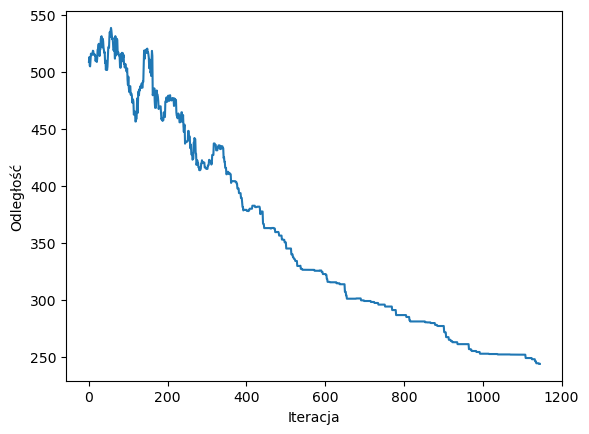

Minimalna odległość: 243.82408596481181


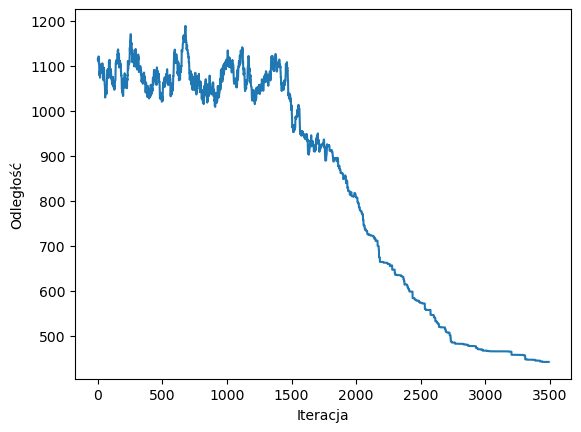

Minimalna odległość: 442.4187117861832


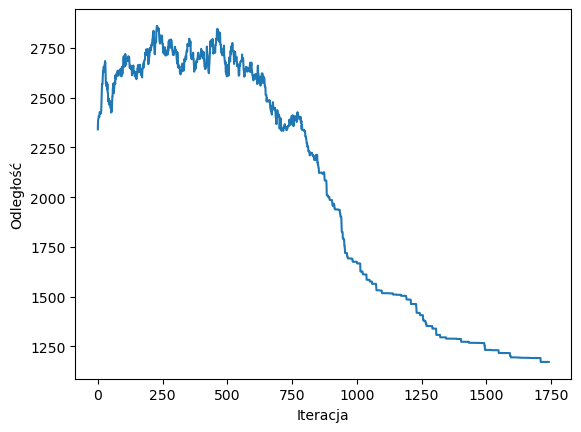

Minimalna odległość: 1170.8816864083258


In [295]:
min_distance = wyzarzanie_vis(np.random.permutation(uniform_points.copy()),T_max=100,type = 'arbitrary', alpha = 0.99)
print(f"Minimalna odległość: {min_distance}")
min_distance = wyzarzanie_vis(np.random.permutation(normal_points.copy()),T_max=40000,type = 'arbitrary', alpha = 0.995)
print(f"Minimalna odległość: {min_distance}")
min_distance = wyzarzanie_vis(np.random.permutation(cluster_points.copy()),T_max=40000,type='arbitrary', alpha = 0.99)
print(f"Minimalna odległość: {min_distance}")

In [ ]:
uniform_points, normal_points, cluster_points = generate_points(uniform_n=50, normal_n=80, clusters_n=90,spread_factor=1.0) 
# visualize(uniform_points)
# visualize(normal_points)
# visualize(cluster_points)

In [ ]:
min_distance = wyzarzanie_vis(np.random.permutation(uniform_points.copy()),T_max=100,type = 'arbitrary', alpha = 0.99)
print(f"Minimalna odległość: {min_distance}")
min_distance = wyzarzanie_vis(np.random.permutation(normal_points.copy()),T_max=40000,type = 'arbitrary', alpha = 0.995)
print(f"Minimalna odległość: {min_distance}")
min_distance = wyzarzanie_vis(np.random.permutation(cluster_points.copy()),T_max=40000,type='arbitrary', alpha = 0.99)
print(f"Minimalna odległość: {min_distance}")

#### Wnioski
- Arbitrary swap (dowolne zamiany) umożliwiają większe przeskoki w przestrzeni rozwiązań, co pomaga unikać lokalnych minimów – szczególnie we wczesnych etapach optymalizacji.

- Consecutive swap (zamiany sąsiednich elementów) prowadzą do bardziej stopniowych zmian, co sprawdza się lepiej przy precyzyjnym doskonaleniu już niezłego rozwiązania.

## Zad 2

#### Zdecydowałam się na implementacje dwóch klas, reprezentujące mapę (obraz) oraz komórkę, czyli jeden piksel.
#### Za pomocą funkcji mapy, możemy: 
- znaleźć sąsiadów danego piksela
- zmienić kolor piksela
- losowo rozmieścić białe i czarne piksele na podstawie delty
- zwraca kopie planszy
- zwraca pełny stan planszy łącznie z listą czarnych i białych komórek
- wczytywanie zapisanych plansz
- graficznie zwizualizować plansze

In [61]:
class cell:
    def __init__(self,value):
        self.value = value
class map:
    def __init__(self, n, delta=0.3, sasiedztwo='4'):
        self.n = n
        self.grid = [[cell(0) for _ in range(n)] for _ in range(n)]
        self.sasiedztwo = sasiedztwo
        self.black_cells = []
        self.white_cells = []
        self._generate(delta)

    def _generate(self, delta):
        total = self.n * self.n
        blacks = int(total * delta)
        positions = [(i, j) for i in range(self.n) for j in range(self.n)]
        random.shuffle(positions)
        for i, j in positions[:blacks]:
            self.grid[i][j].value = 1
            self.black_cells.append((i, j))
        for i, j in positions[blacks:]:
            self.white_cells.append((i, j))
    
    def get_neighbors(self, i, j, return_coords=False):
        directions = []
        if self.sasiedztwo == '4':
            directions = [(-1,0), (1,0), (0,-1), (0,1)]
        elif self.sasiedztwo == '8':
            directions = [(-1,0), (1,0), (0,-1), (0,1),
                          (-1,-1), (-1,1), (1,-1), (1,1)]
        elif self.sasiedztwo == '16':
            directions = [(-1,0), (1,0), (0,-1), (0,1),
                          (-1,-1), (-1,1), (1,-1), (1,1),
                          (-2,0), (2,0), (0,-2), (0,2),
                          (-2,-2), (-2,2), (2,-2), (2,2)]

        if return_coords:
            return directions

        neighbors = []
        for dx, dy in directions:
            ni = (i + dx) % self.n
            nj = (j + dy) % self.n
            neighbors.append(self.grid[ni][nj])
        return neighbors

    def flip_cell(self, i, j):
        cell = self.grid[i][j]
        cell.value = 1 - cell.value
        pos = (i, j)
        if cell.value == 1:
            if pos in self.white_cells:
                self.white_cells.remove(pos)
            self.black_cells.append(pos)
        else:
            if pos in self.black_cells:
                self.black_cells.remove(pos)
            self.white_cells.append(pos)


    def copy_state(self):
        return [[cell.value for cell in row] for row in self.grid]

    def load_state(self, state):
        for i in range(self.n):
            for j in range(self.n):
                self.grid[i][j].value = state[i][j]
    def save_state(self):
        return {
            "grid": self.copy_state(),
            "black_cells": self.black_cells.copy(),
            "white_cells": self.white_cells.copy()
        }

    def load_full_state(self, state):
        self.load_state(state["grid"])
        self.black_cells = state["black_cells"].copy()
        self.white_cells = state["white_cells"].copy()
        
    def show(self, title="Mapka"):
        data = np.array([[cell.value for cell in row] for row in self.grid])
        plt.figure(figsize=(6,6))
        plt.imshow(data, cmap='Greys', interpolation='none')
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
    
    

#### Zaimplementowałam 3 funkcje energii:
- funkcja która promuje zbieranie się pikseli tego samego koloru obok siebie
- funkcja która promuje zbieranie się komórek tego samego koloru po prawej i lewej strony (poziome pasy)
- funkcja która promuje jak największe różnice pomiędzy sąsiadami
- funkcja która generuje wzór pierścieni
- funkcja która generuje wzór spirali

In [76]:
def energy_basic(mapka, i, j):
    value = mapka.grid[i][j].value
    neighbors = mapka.get_neighbors(i, j)
    suma = 0
    for n in neighbors:
        if n.value != value:
            suma += 1  
    return suma

def energy_horizontal(mapka, i, j):
    my_cell = mapka.grid[i][j].value
    n = mapka.n

    left = mapka.grid[i][(j-1) %n].value
    right = mapka.grid[i][(j+1) %n].value

    top = mapka.grid[(i-1)%n][j].value
    bottom = mapka.grid[(i+1) %n][j].value

    suma = 0
    if left != my_cell:
        suma += 1
    if right != my_cell:
        suma += 1
    if top == my_cell:
        suma += 1
    if bottom == my_cell:
        suma += 1

    return suma

def energy_gradient(mapka, i, j):
    my_cell = mapka.grid[i][j].value
    sas = mapka.get_neighbors(i, j)
    suma = 0
    for n in sas:
        if n.value == my_cell:
            suma += 1
    return suma 

def radial_energy(mapka, x, y):
    n = mapka.n
    if mapka.grid[x][y].value == 0:
        return 0
    cx, cy = n / 2, n / 2
    dist = ((x - cx) ** 2 + (y - cy) ** 2) ** 0.5
    return dist

def spiral_energy(mapka, x, y):
    n = mapka.n
    if mapka.grid[x][y].value == 0:
        return 0
    cx, cy = n / 2, n / 2
    dx, dy = x - cx, y - cy
    r = np.sqrt(dx ** 2 + dy ** 2)
    theta = np.arctan2(dy, dx)
    target = (theta + r / 5.0) % (2 * np.pi)
    return abs(target - np.pi)


#### Liczenie kosztu/energii:
Aby program był szybszy, nie będę liczyć całkowitej energii przechodząc przez całą mapę. Postanowiłam liczyć tylko energię która się zmienia, czyli piksela który zamieniamy miejscem oraz jego sąsiadów.

In [52]:
def local_energy(mapka, i, j, energy_fn):
    positions = set()
    positions.add((i, j))
    for dx, dy in mapka.get_neighbors(i, j, return_coords=True):  # będziemy potrzebować współrzędnych
        ni = (i + dx) % mapka.n
        nj = (j + dy) % mapka.n
        positions.add((ni, nj))
    return sum(energy_fn(mapka, x, y) for x, y in positions)
    

#### Główny algorytm wyżarzania:

In [53]:
def simulated_annealing(mapka, energy_fn, T_start=1000.0, T_end=0.01, alpha=0.999):
    T = T_start
    n = mapka.n

    while T > T_end:
        i, j = random.choice(mapka.black_cells)
        q, z = random.choice(mapka.white_cells)

        affected_coords = {(i, j), (q, z)}
        for dx, dy in mapka.get_neighbors(0, 0, return_coords=True):
            affected_coords.add(((i + dx) % n, (j + dy) % n))
            affected_coords.add(((q + dx) % n, (z + dy) % n))

        current_energy = sum(energy_fn(mapka, x, y) for x, y in affected_coords)

        prev_state = mapka.save_state()
        mapka.flip_cell(i, j)
        mapka.flip_cell(q, z)

        new_energy = sum(energy_fn(mapka, x, y) for x, y in affected_coords)
        delta = new_energy - current_energy

        if delta <= 0 or random.random() < np.exp(-delta / T):
            pass
        else:
            mapka.load_full_state(prev_state)

        T *= alpha

    return mapka


#### Wizualizacje:

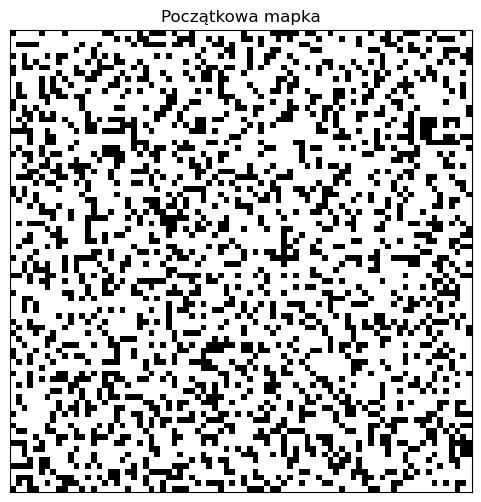

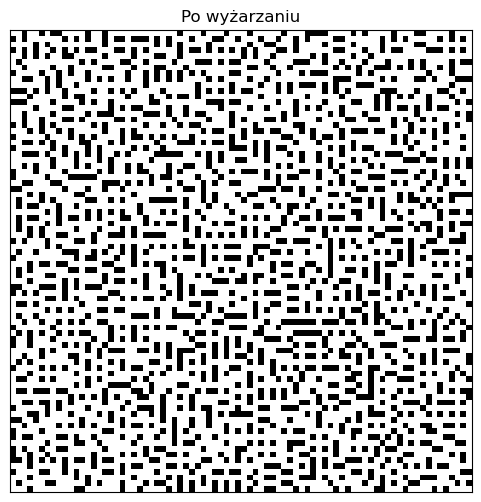

In [54]:
mapka = map(n=80, delta=0.3, sasiedztwo='8')
mapka.show("Początkowa mapka")
mapka = simulated_annealing(mapka, energy_gradient)
mapka.show("Po wyżarzaniu")

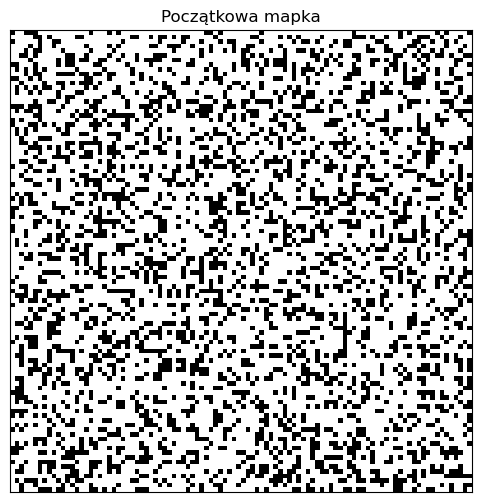

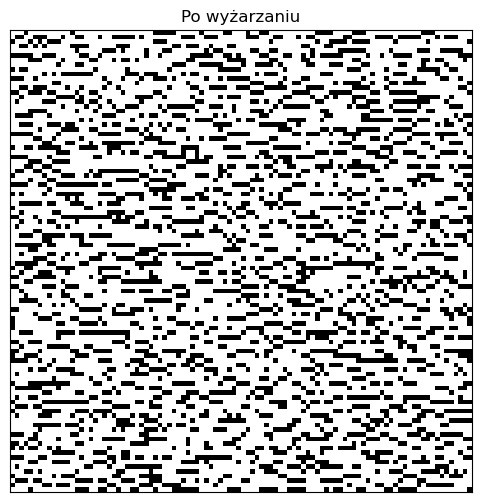

In [63]:
mapka = map(n=100, delta=0.3, sasiedztwo='4')
mapka.show("Początkowa mapka")
mapka = simulated_annealing(mapka, energy_horizontal_symmetry)
mapka.show("Po wyżarzaniu")

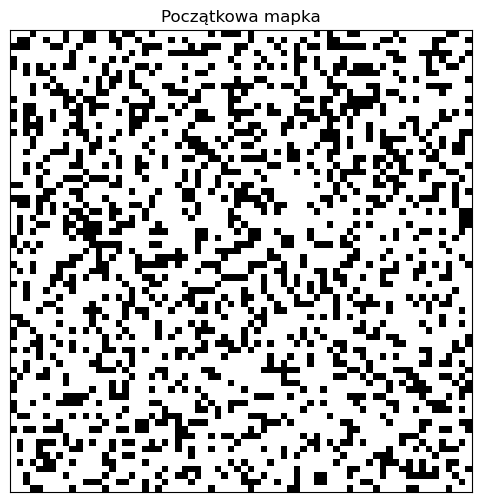

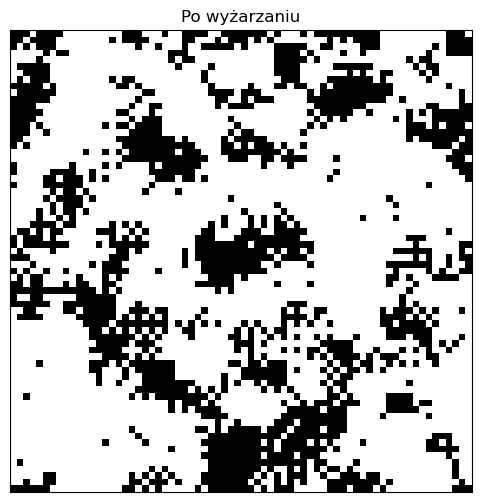

In [62]:
mapka = map(n=70, delta=0.3, sasiedztwo='16')
mapka.show("Początkowa mapka")
mapka = simulated_annealing(mapka, energy_basic)
mapka.show("Po wyżarzaniu")

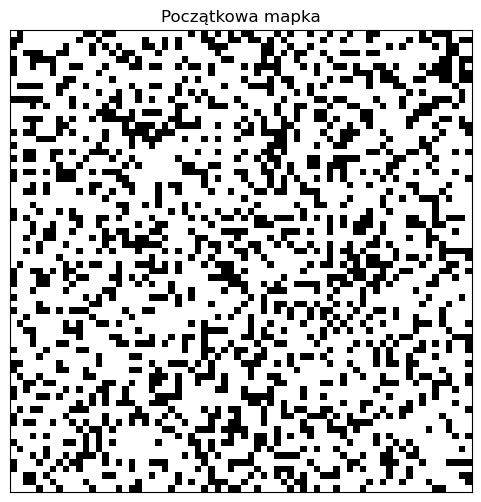

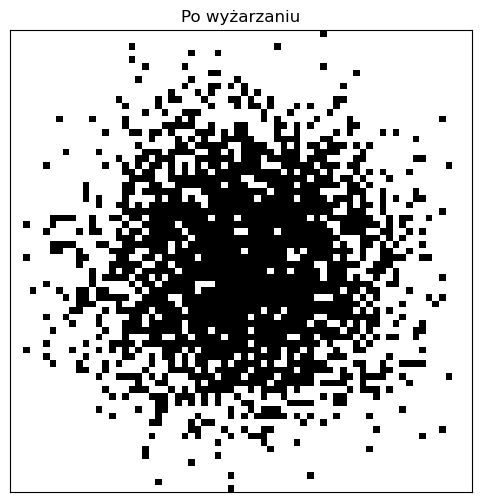

In [74]:
mapka = map(n=70, delta=0.3, sasiedztwo='16')
mapka.show("Początkowa mapka")
mapka = simulated_annealing(mapka, radial_energy)
mapka.show("Po wyżarzaniu")

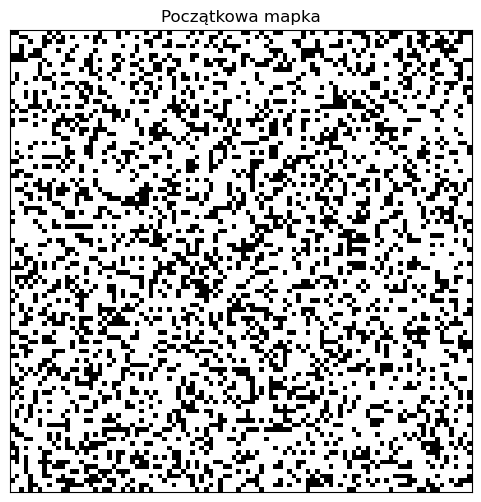

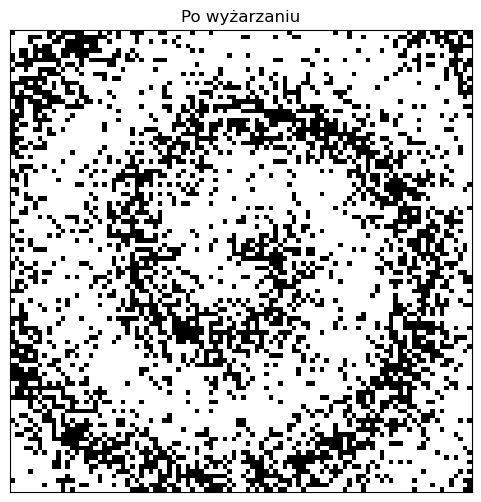

In [77]:
mapka = map(n=100, delta=0.3, sasiedztwo='16')
mapka.show("Początkowa mapka")
mapka = simulated_annealing(mapka, spiral_energy)
mapka.show("Po wyżarzaniu")

### GIFY:


In [66]:
def save_frame(mapka):
    data = np.array([[cell.value for cell in row] for row in mapka.grid])
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(data, cmap='Greys', interpolation='none')
    ax.axis('off')
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    buf.seek(0)
    return Image.open(buf)

In [67]:
def simulated_annealing_gif(mapka, energy_fn, T_start=1000.0, T_end=0.01, alpha=0.995, steps_per_frame=50, gif_name="wyzarzanie.gif"):
    frames = []
    T = T_start
    n = mapka.n

    def save_frame():
        data = np.array([[cell.value for cell in row] for row in mapka.grid])
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(data, cmap='Greys', interpolation='none')
        ax.set_title(f"T = {T:.2f}")
        ax.axis('off')
        buf = io.BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
        plt.close(fig)
        buf.seek(0)
        return Image.open(buf)

    frames.append(save_frame())

    while T > T_end:
        for _ in range(steps_per_frame):
            i, j = random.choice(mapka.black_cells)
            q, z = random.choice(mapka.white_cells)

            affected_coords = {(i, j), (q, z)}
            for dx, dy in mapka.get_neighbors(0, 0, return_coords=True):
                affected_coords.add(((i + dx) % n, (j + dy) % n))
                affected_coords.add(((q + dx) % n, (z + dy) % n))

            current_energy = sum(energy_fn(mapka, x, y) for x, y in affected_coords)

            prev_state = mapka.save_state()
            mapka.flip_cell(i, j)
            mapka.flip_cell(q, z)

            new_energy = sum(energy_fn(mapka, x, y) for x, y in affected_coords)
            delta = new_energy - current_energy

            if delta <= 0 or random.random() < np.exp(-delta / T):
                pass
            else:
                mapka.load_full_state(prev_state)

        T *= alpha
        frames.append(save_frame())

    frames[0].save(gif_name, save_all=True, append_images=frames[1:], duration=80, loop=0)
    print(f"GIF zapisany jako '{gif_name}'")

    return mapka

In [79]:
mapka = map(n=70, delta=0.3, sasiedztwo='16')
simulated_annealing_gif(mapka, energy_fn=spiral_energy, gif_name="moja_animacja.gif")

GIF zapisany jako 'moja_animacja.gif'


## Zad 3 - sudoku

Postanowiłam że cyfry, które można zamieniać będę oznaczała poprzez dodanie do nich 10. Pomysł na zadanie:
1. Wypełnić wolne pola tak aby w każdy bloczku 3x3 nie powtarzały się cyfry
2. Zamieniać w losowo wybranym bloczku, losowo dwie wybrane cyfry, które można zamieniać.
Funkcja liczenia kosztu w takim razie opiera się tylko na analizie kolumn i wierszy:

In [30]:
def cost(sudoku):
    s = np.array(sudoku, dtype=int)  
    s[s > 10] -= 10 

    total = 0
    for i in range(9):
        unique = len(np.unique(s[:, i])) + len(np.unique(s[i, :]))
        total += 18 - unique
    return total

#### Funkcja rodzielająca tablice dwuwymiarową na bloczki 3x3

In [33]:
def blocks(sudoku):
    blocks = []
    for block_row in range(3):
        for block_col in range(3):
            block = []
            for i in range(3):
                for j in range(3):
                    row = block_row * 3 + i
                    col = block_col * 3 + j
                    block.append(sudoku[row][col])
            blocks.append(block)
    return blocks

In [34]:
def print_sudoku(sudoku):
    for i, row in enumerate(sudoku):
        if i % 3 == 0 and i != 0:
            print("-" * 21)
        row_str = ""
        for j, val in enumerate(row):
            if j % 3 == 0 and j != 0:
                row_str += "| "
            row_str += f"{val if val != 0 else '.'} "
        print(row_str)

In [35]:
def start_fill_sudoku(sudoku):
    bloki = blocks(sudoku)
    for i in range(0,9):
        numbers = [1,2,3,4,5,6,7,8,9]
        for j in range(0,9):
            if bloki[i][j] in numbers:
                numbers.remove(bloki[i][j])
        for j in range(0,9):
            if bloki[i][j] == 'x':
                bloki[i][j] = 10 + random.choice(numbers)
                numbers.remove(bloki[i][j]-10)
    sudoku = blocks_to_sudoku(bloki)
    return sudoku  

In [36]:
def blocks_to_sudoku(blocks):
    sudoku = [[0 for _ in range(9)] for _ in range(9)]
    
    for block_index, block in enumerate(blocks):
        block_row = block_index // 3
        block_col = block_index % 3

        for i in range(3):
            for j in range(3):
                row = block_row*3 +i
                col = block_col*3 +j
                sudoku[row][col] =block[i*3 +j]
    return sudoku
    

### Główna funkcja rozwiązująca sudoku 

In [78]:
def solve_sudoku(przyklad, T_max=1000, alpha=0.99):
    found = False
    sudoku = przyklad.copy()
    sudoku = start_fill_sudoku(sudoku)
    while found is False:
        current_cost = cost(sudoku)
        
        # zmiana w bloczku 3x3 
        idx_blok = random.randint(0, 8)
        #losowanie tych dwóch co się zamienią
        bloki = blocks(sudoku)
        to_flip =[]
        for i in range(9):
            if bloki[idx_blok][i] >10:
                to_flip.append(i)
        if len(to_flip) < 2:
            T_max *= alpha
            continue
        idx1, idx2 = random.sample(to_flip,2)
        
        
        temp = bloki[idx_blok][idx1]
        bloki[idx_blok][idx1] = bloki[idx_blok][idx2]
        bloki[idx_blok][idx2] = temp
        
        new_sudoku = blocks_to_sudoku(bloki)
        second_cost = cost(new_sudoku)
        
        delta = second_cost - current_cost
        if delta <= 0 or random.random() < np.exp(-delta / T_max):
            sudoku = new_sudoku
            if second_cost == 0:
                found = True
        else:
            bloki = blocks(sudoku)
            temp = bloki[idx_blok][idx1]
            bloki[idx_blok][idx1] = bloki[idx_blok][idx2]
            bloki[idx_blok][idx2] = temp

        T_max *= alpha
    sudoku = delete_tens(sudoku)
    return sudoku


#### Funkcja pomocnicza, by poodejmować dziesiątki od liczb które można było zamieniać

In [38]:
def delete_tens(sudoku):
    for i in range (0,9):
        for j in range(0,9):
            if sudoku[i][j] > 10:
                sudoku[i][j] = sudoku[i][j] - 10
    return sudoku


In [43]:
sudoku_proste = [
    ['x', 'x', 'x', 2, 6, 'x', 7, 'x', 1],
    [6, 8, 'x', 'x', 7, 'x', 'x', 9, 'x'],
    [1, 9, 'x', 'x', 'x', 4, 5, 'x', 'x'],

    [8, 2, 'x', 1, 'x', 'x', 'x', 4, 'x'],
    ['x', 'x', 4, 6, 'x', 2, 9, 'x', 'x'],
    ['x', 5, 'x', 'x', 'x', 3, 'x', 2, 8],

    ['x', 'x', 9, 3, 'x', 'x', 'x', 7, 4],
    ['x', 4, 'x', 'x', 5, 'x', 'x', 3, 6],
    [7, 'x', 3, 'x', 1, 8, 'x', 'x', 'x']
]
sud = solve_sudoku(sudoku_proste)
print_sudoku(sud)
print(is_valid_sudoku(sud))

4 3 5 | 2 6 9 | 7 8 1 
6 8 2 | 5 7 1 | 4 9 3 
1 9 7 | 8 3 4 | 5 6 2 
---------------------
8 2 6 | 1 9 5 | 3 4 7 
3 7 4 | 6 8 2 | 9 1 5 
9 5 1 | 7 4 3 | 6 2 8 
---------------------
5 1 9 | 3 2 6 | 8 7 4 
2 4 8 | 9 5 7 | 1 3 6 
7 6 3 | 4 1 8 | 2 5 9 
True


In [80]:
def is_valid_sudoku(sudoku):
    # Sprawdź wiersze
    for row in sudoku:
        if sorted(row) != list(range(1, 10)):
            return False

    for col in range(9):
        column = [sudoku[row][col] for row in range(9)]
        if sorted(column) != list(range(1, 10)):
            return False

    for block_row in range(0, 9, 3):
        for block_col in range(0, 9, 3):
            block = [
                sudoku[r][c]
                for r in range(block_row, block_row + 3)
                for c in range(block_col, block_col + 3)
            ]
            if sorted(block) != list(range(1, 10)):
                return False

    return True